# Import Required Libraries
Import all necessary libraries such as numpy, pandas, matplotlib, mplhep, and others used in the script.

In [ ]:
print("working?!")

working?


In [2]:
pip install numba

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install matplotlib pandas uproot termcolor numba mplhep  

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot as upr
import awkward as ak

#Color printing
from termcolor import colored

from matplotlib.colors import LogNorm
import shutil
import os
import numba as nb
import re
from numba import jit

# Add module paths
import sys

# os.chdir('/scratch_cmsse/akalinow/CMS/OMTF/PhaseII/PythonAnalysis') 
os.chdir('/scratch/gjedrzej/Masters/CMS/OMTF/PhaseII/PythonAnalysis') 


sys.path.append(os.path.join(os.getcwd(), "python"))
import importlib
import system_and_data as sd
import plotting_functions as pf

### Load the data

In [9]:
importlib.reload(sd)

# Paths to data and output figures
# DATA_PATH = '/home/akalinow/scratch/CMS/OMTF/PhaseII/analysis_DataDump_15_1_0_pre4/'
DATA_PATH = '/scratch/gjedrzej/Masters/CMS/OMTF/PhaseII/analysis_DataDump_15_1_0_pre4/'

FIG_PATH_SA = './fig_png/'
FIG_PATH_TK = './fig_png/'

# Tree name and branch names in ROOT files
TREE_NAME = "tOmtf"
BRANCH_L1 = 'l1ObjColl/theL1Obj/theL1Obj.*'
BRANCH_GEN = 'genColl/theColl/theColl._*'

# Input file names
FILENAME_PROMPT_COLL = 'omtfTree.root'
FILENAME_DISP_COLL = 'omtfTree.root'

# Global settings for efficiency plots
PT_CUTS = [0, 5, 12, 20]

# Load generated muon data
data_gen_prompt = sd.load_data(FILENAME_PROMPT_COLL, DATA_PATH, TREE_NAME, BRANCH_GEN)
data_gen_disp = sd.load_data(FILENAME_DISP_COLL, DATA_PATH, TREE_NAME, BRANCH_GEN)

# # Load L1 object data
data_prompt = sd.load_data(FILENAME_PROMPT_COLL, DATA_PATH, TREE_NAME, BRANCH_L1)
data_displaced = sd.load_data(FILENAME_DISP_COLL, DATA_PATH, TREE_NAME, BRANCH_L1)
# Select only SA muons (type 16) for displaced dataset    
data_displaced_SA = data_displaced[data_displaced['theL1Obj.type'] == 16]
data_displaced_SA = sd.match_gen_muons(data_displaced_SA, data_gen_disp)

# Select only SA muons (type 16) for prompt dataset
data_prompt_SA = data_prompt[data_prompt['theL1Obj.type'] == 16]
data_prompt_SA = sd.match_gen_muons(data_prompt_SA, data_gen_prompt)

# # Select Tracker Muons (type 15)
data_TK = data_prompt[data_prompt['theL1Obj.type'] == 15]
data_TK = sd.match_gen_muons(data_TK, data_gen_prompt)

Loading data from omtfTree.root tree: tOmtf, branch: genColl/theColl/theColl._* Data shape: (3, 14)
Loading data from omtfTree.root tree: tOmtf, branch: genColl/theColl/theColl._* Data shape: (3, 14)
Loading data from omtfTree.root tree: tOmtf, branch: l1ObjColl/theL1Obj/theL1Obj.* Data shape: (5, 18)
Loading data from omtfTree.root tree: tOmtf, branch: l1ObjColl/theL1Obj/theL1Obj.* Data shape: (5, 18)


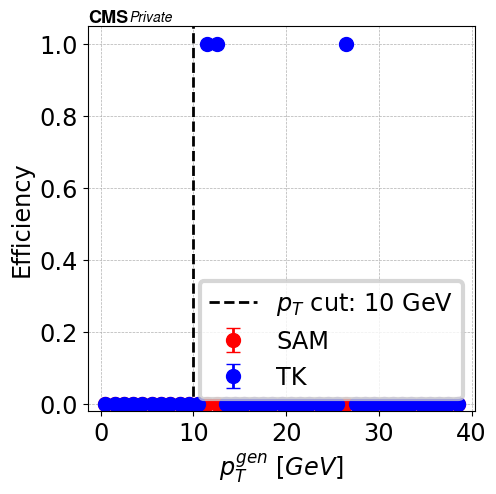

In [10]:
importlib.reload(pf)

bins = np.arange(0, 40, 1)

pf.plot_efficiency_comparison(
    [data_prompt_SA, data_TK], [data_gen_prompt, data_gen_prompt], 
    ['SAM', 'TK'], 'theColl._pt', 
    bins=bins, xlabel=r'$p_{T}^{gen} \ [GeV]$', 
    ylabel='Efficiency', title=r'', 
    fig_path=FIG_PATH_SA, save=True, ptCut=10
)

/home/gjedrzej/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/gjedrzej/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


Saved figure to ./fig_png/SingleMu_sample_Total_stub_count_p_d.png
Saved figure to ./fig_png/SingleMu_sample_Common_stub_count_p_d.png


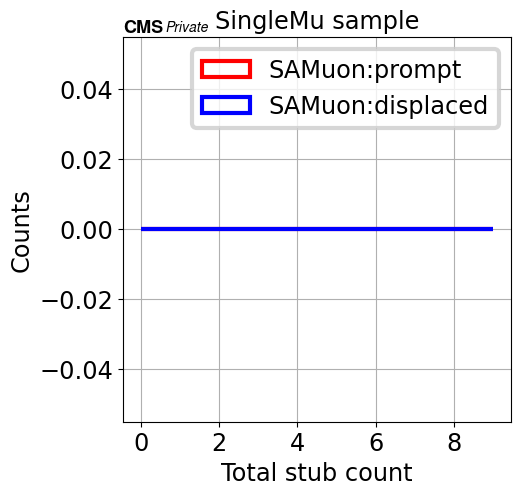

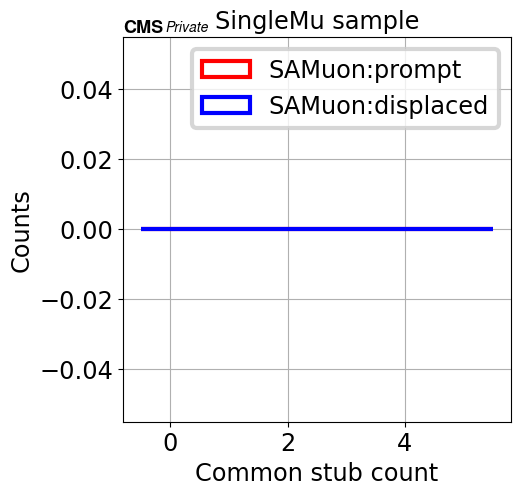

In [11]:
pf.histogram_1D_comparison(
    [data_prompt_SA,data_displaced_SA], ['SAMuon:prompt','SAMuon:displaced'], 'theL1Obj.totalStubCount',
    bins=np.arange(0, 10, 1), xlabel=r'Total stub count',
    ylabel='Counts', title=r'SingleMu sample',
    fig_path=FIG_PATH_SA, save=True
)

pf.histogram_1D_comparison(
    [data_prompt_SA,data_displaced_SA], ['SAMuon:prompt','SAMuon:displaced'], 'theL1Obj.commonStubCount',
    bins=np.arange(-0.5, 6.5, 1), xlabel=r'Common stub count',
    ylabel='Counts', title=r'SingleMu sample',
    fig_path=FIG_PATH_SA, save=True
)

Saved figure to ./fig_png/SingleMu_sample_Common_stub_count_p_d.png


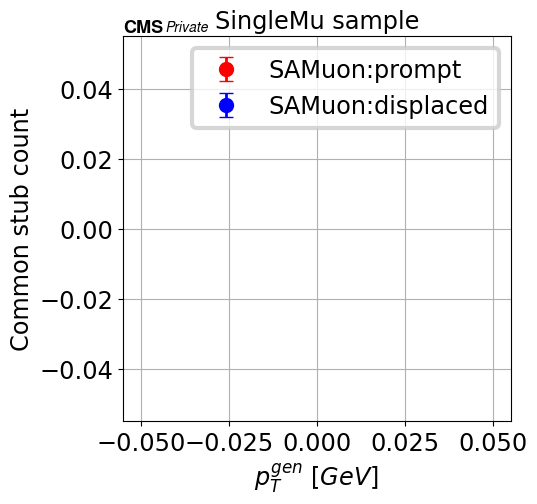

In [12]:
pf.plot_mean_comparison(
    [data_prompt_SA,data_displaced_SA], ['SAMuon:prompt','SAMuon:displaced'], 'theColl._pt', 'theL1Obj.commonStubCount',
    bins=bins, xlabel=r'$p_{T}^{gen} \ [GeV]$',
    ylabel='Common stub count', title=r'SingleMu sample',
    fig_path=FIG_PATH_SA, save=True, density=False
)

In [62]:
#dir(hep) #?

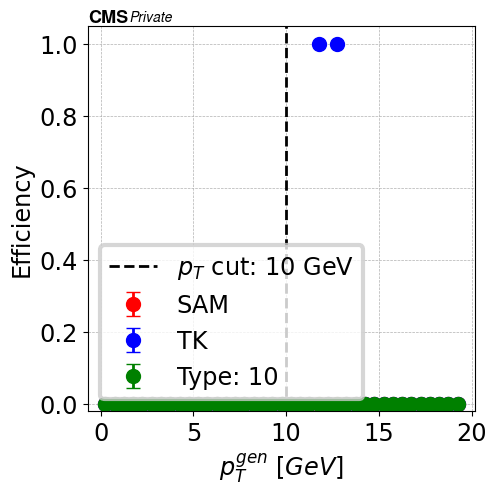

In [13]:
importlib.reload(pf)

#15, 16 ->  14, 10, 11, 12
prototype = 10
data_prompt_proto = data_prompt[data_prompt['theL1Obj.type'] == prototype]
data_prompt_proto = sd.match_gen_muons(data_prompt_proto, data_gen_prompt)


bins = np.arange(0, 20, 0.5)

pf.plot_efficiency_comparison(
    [data_prompt_SA, data_TK, data_prompt_proto], [data_gen_prompt, data_gen_prompt, data_gen_prompt], 
    ['SAM', 'TK', f'Type: {prototype}'], 'theColl._pt', 
    bins=bins, xlabel=r'$p_{T}^{gen} \ [GeV]$', 
    ylabel='Efficiency', title=r'', 
    fig_path=FIG_PATH_SA, save=True, ptCut=10
)


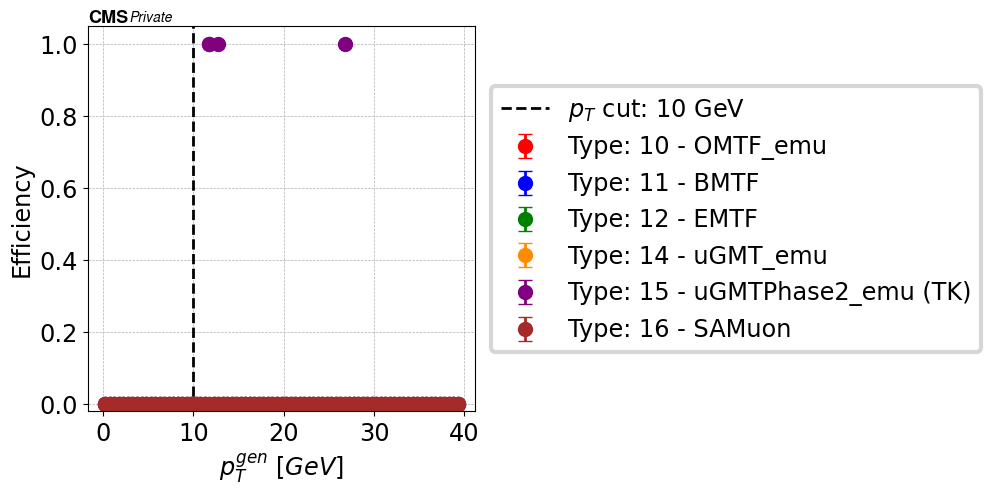

In [14]:
datasets_to_plot = []
datasets_gen_match = []
plot_labels = []


type_range = np.array([10, 11, 12, 14, 15, 16])
#From L1Obj.h
#enum TYPE { NONE, RPCb, RPCf, DT, CSC, GMT, RPCb_emu, RPCf_emu, GMT_emu, OMTF, OMTF_emu, BMTF, EMTF, uGMT, uGMT_emu, uGMTPhase2_emu, SAMuon};
type_descriptions = {
    0: 'NONE',
    1: 'RPCb',
    2: 'RPCf',
    3: 'DT',
    4: 'CSC',
    5: 'GMT',
    6: 'RPCb_emu',
    7: 'RPCf_emu',
    8: 'GMT_emu',
    9: 'OMTF',
    10: 'OMTF_emu',
    11: 'BMTF',
    12: 'EMTF',
    13: 'uGMT',
    14: 'uGMT_emu',
    15: 'uGMTPhase2_emu (TK)',
    16: 'SAMuon'
}


for i in type_range:
    description = type_descriptions.get(i, 'Unknown Type')
    data_prompt_type = data_prompt[data_prompt['theL1Obj.type'] == i]
    data_prompt_type_matched = sd.match_gen_muons(data_prompt_type, data_gen_prompt)
    datasets_to_plot.append(data_prompt_type_matched)
    datasets_gen_match.append(data_gen_prompt)
    plot_labels.append(f'Type: {i} - {description}')

bins = np.arange(0, 40, 0.5)
pf.plot_efficiency_comparison(datasets_to_plot, datasets_gen_match, plot_labels, 
                              'theColl._pt', bins=bins, xlabel=r'$p_{T}^{gen} \ [GeV]$', ylabel='Efficiency',
                                title=r'', fig_path=FIG_PATH_SA, save=True, ptCut=10)
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))